<a href="https://colab.research.google.com/github/guptankit005/Analytics/blob/master/Linear_Regression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [189]:
#importing dataset
from sklearn.datasets import fetch_california_housing

In [190]:
#loading dataset 
california_housing = fetch_california_housing()
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [191]:
#converting data into pandas dataframe
california_housing_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_housing_data['median_house_value'] = pd.Series(california_housing.target)

In [192]:
#creating X and y
#X_feature = list(california_housing_data.columns)
#X_feature.remove('target')
#X = california_housing_data[X_feature]

#y = california_housing_data['target']

In [193]:
california_housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [194]:
  from sklearn.model_selection import train_test_split
  #X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
  train_set, test_set = train_test_split(california_housing_data, test_size=0.25, random_state=42)

In [195]:
#let's check our training data
#training_data = X_training
#training_data['target'] = y_training

# Data Understanding

In [196]:
#printing first five rows of data
train_set.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
8158,4.2143,37.0,5.288235,0.973529,860.0,2.529412,33.81,-118.12,2.285
18368,5.3468,42.0,6.364322,1.087940,957.0,2.404523,37.16,-121.98,2.799
19197,3.9191,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69,1.830
3746,6.3703,32.0,6.000000,0.990196,1159.0,2.272549,34.16,-118.41,4.658
13073,2.3684,17.0,4.795858,1.035503,706.0,2.088757,38.57,-121.33,1.500


In [197]:
#printing summary statistic
train_set.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.00000,15480.000000,15480.000000
mean,3.878314,28.595995,5.435598,1.096881,1427.497287,3.106660,35.64672,-119.583736,2.070349
std,1.903788,12.611330,2.421650,0.438804,1142.930862,11.955834,2.13395,2.002442,1.155163
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.55000,-124.350000,0.149990
25%,2.566925,18.000000,4.450000,1.006593,788.750000,2.430205,33.94000,-121.800000,1.196750
50%,3.543900,29.000000,5.232331,1.049346,1167.000000,2.817672,34.27000,-118.510000,1.796000
75%,4.762500,37.000000,6.058141,1.100143,1727.000000,3.280020,37.72000,-118.010000,2.647000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.95000,-114.310000,5.000010


In [198]:
#getting data info
train_set.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'median_house_value'],
      dtype='object')

In [199]:
#getting train_set data type information
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 8158 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              15480 non-null  float64
 1   HouseAge            15480 non-null  float64
 2   AveRooms            15480 non-null  float64
 3   AveBedrms           15480 non-null  float64
 4   Population          15480 non-null  float64
 5   AveOccup            15480 non-null  float64
 6   Latitude            15480 non-null  float64
 7   Longitude           15480 non-null  float64
 8   median_house_value  15480 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


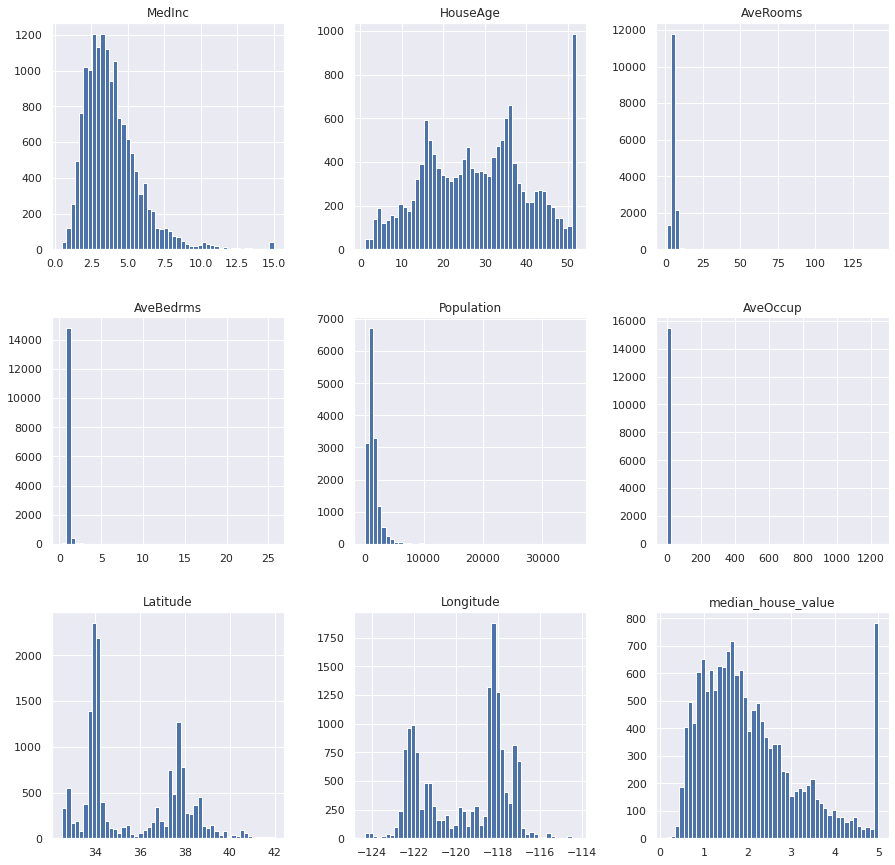

In [200]:
# histogram
train_set.hist(bins=50, figsize=(15, 15))
plt.show()

Boxplot for MedInc
-------------------------


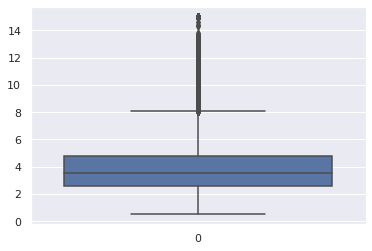


Boxplot for HouseAge
-------------------------


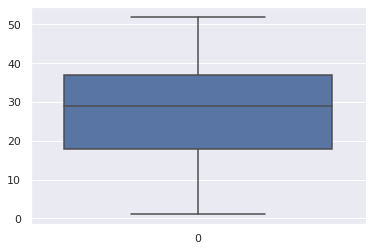


Boxplot for AveRooms
-------------------------


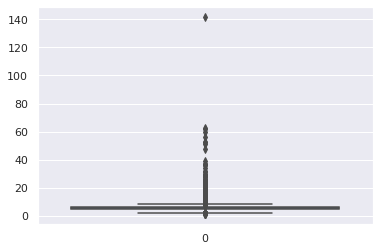


Boxplot for AveBedrms
-------------------------


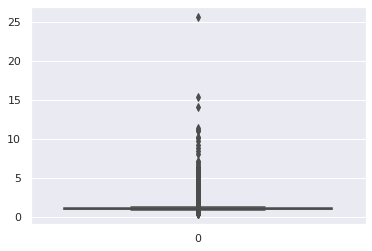


Boxplot for Population
-------------------------


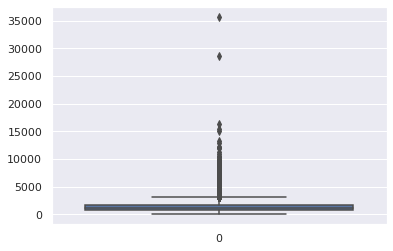


Boxplot for AveOccup
-------------------------


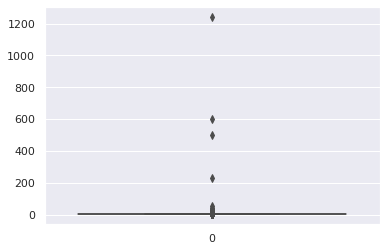


Boxplot for Latitude
-------------------------


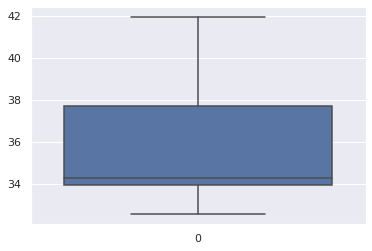


Boxplot for Longitude
-------------------------


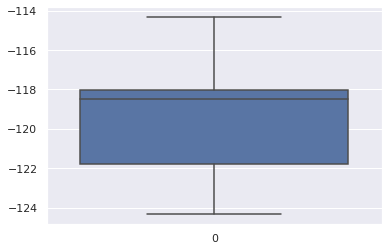


Boxplot for median_house_value
-------------------------


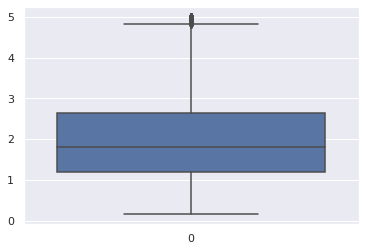

In [201]:
#plotting boxplot
import seaborn as sns
for i in train_set.columns:
  print('Boxplot for', i)
  print('-------------------------')
  #plotting chart
  sns.boxplot(data=train_set[i].values)
  plt.show()
  print('')

In [202]:
#creating a function to find outliers in all the numerical columns 
def outlier_analyse(dataf):
    import pandas as pd
    iqr_data = []
    l_limit = []
    u_limit = []
    outlier_d = []
    outlier_per = []
    for i in dataf.columns:
        IQR = dataf[str(i)].quantile(0.75) - dataf[str(i)].quantile(0.25)
        iqr_data.append(IQR)
        lower_limit = dataf[str(i)].quantile(0.25) - (1.5 * IQR)
        l_limit.append(lower_limit)
        upper_limit = dataf[str(i)].quantile(0.75) + (1.5 * IQR)
        u_limit.append(upper_limit)
        outlier = ((dataf[str(i)] < lower_limit ) | (dataf[str(i)] > upper_limit)).sum()
        outlier_d.append(outlier)
        outlier_p = round(((outlier*100)/(dataf[str(i)].count())),2)
        outlier_per.append(outlier_p)     

        
        
    outlier_data = {'Feature': dataf.columns,'IQR' : iqr_data, 'Lower_Limit' : l_limit,'Upper_Limit': u_limit,
                    'Outlier_Count' : outlier_d, 'Outlier_Percent' : outlier_per}
    outlier_data = pd.DataFrame(outlier_data)
    return(outlier_data)
    

In [203]:
outliers = outlier_analyse(train_set)
outliers

,Feature,IQR,Lower_Limit,Upper_Limit,Outlier_Count,Outlier_Percent
0,MedInc,2.195575,-0.726437,8.055862,505,3.26
1,HouseAge,19.000000,-10.500000,65.500000,0,0.00
2,AveRooms,1.608141,2.037789,8.470351,393,2.54
3,AveBedrms,0.093550,0.866268,1.240468,1084,7.00
4,Population,938.250000,-618.625000,3134.375000,887,5.73
5,AveOccup,0.849815,1.155483,4.554742,544,3.51
6,Latitude,3.780000,28.270000,43.390000,0,0.00
7,Longitude,3.790000,-127.485000,-112.325000,0,0.00
8,median_house_value,1.450250,-0.978625,4.822375,815,5.26


In [204]:
pip install feature_engine

In [205]:
#importing Winsorizer from sklearn
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'median_house_value'])  

In [206]:
#removing outliers through winsorization
train_data = winsor.fit_transform(train_set)

In [207]:
#checking for outliers again
outliers_winsorized = outlier_analyse(train_data)
outliers_winsorized

,Feature,IQR,Lower_Limit,Upper_Limit,Outlier_Count,Outlier_Percent
0,MedInc,2.195575,-0.726437,8.055862,0,0.0
1,HouseAge,19.000000,-10.500000,65.500000,0,0.0
2,AveRooms,1.608141,2.037789,8.470351,0,0.0
3,AveBedrms,0.093550,0.866268,1.240468,0,0.0
4,Population,938.250000,-618.625000,3134.375000,0,0.0
5,AveOccup,0.849815,1.155483,4.554742,0,0.0
6,Latitude,3.780000,28.270000,43.390000,0,0.0
7,Longitude,3.790000,-127.485000,-112.325000,0,0.0
8,median_house_value,1.450250,-0.978625,4.822375,0,0.0


In [208]:
#lets seperate our data as feature and targets
#creating X and y
X_train_feature = list(train_set.columns)
X_train_feature.remove('median_house_value')
X_training = train_data[X_train_feature]

y_training = train_data['median_house_value']

print(X_training.shape)
print(y_training.shape)


X_test_feature = list(test_set.columns)
X_test_feature.remove('median_house_value')
X_testing = test_set[X_test_feature]

y_testing = test_set['median_house_value']

print(X_testing.shape)
print(y_testing.shape)


(15480, 8)
(15480,)
(5160, 8)
(5160,)


In [209]:
#standardizing the data
from sklearn.preprocessing import MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_training)
X_test = MinMaxScaler().fit_transform(X_testing)

#y_train = (y_training-y_training.mean()) / y_training.std()
#y_test = (y_testing-y_testing.mean()) / y_testing.std()

y_train = y_training
y_test = y_testing

print('X_train',type(X_train),X_train.shape)
print('y_train',type(y_train),y_train.shape)
print('X_test', type(X_test),X_test.shape)
print('y_test', type(y_test),y_test.shape)

X_train <class 'numpy.ndarray'> (15480, 8)
y_train <class 'pandas.core.series.Series'> (15480,)
X_test <class 'numpy.ndarray'> (5160, 8)
y_test <class 'pandas.core.series.Series'> (5160,)


# Building the model

# Using sklearn

Training Data Evaluation Metrics
MEA (Mean Absolute Error) : 0.483672782787539
MSE (Mean Squared Error) : 0.4197378576009836
RMSE (Root Mean Squared Error) : 0.6478717910211739
R2 (R-square Score) : 0.6729047911168806

Test Data Evaluation Metrics
MEA (Mean Absolute Error) : 0.5680121101923322
MSE (Mean Squared Error) : 0.6610004036294882
RMSE (Root Mean Squared Error) : 0.8130193131958725
R2 (R-square Score) : 0.5004599761935016



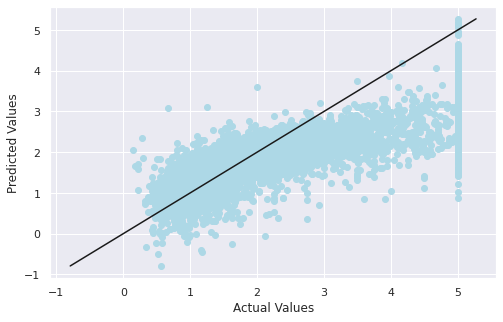

In [210]:
#importing linear regression library
from sklearn.linear_model import LinearRegression
#importing evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

linreg = LinearRegression().fit(X_train,y_train)
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

 #evaluation metrics for training data
print('Training Data Evaluation Metrics')
print("MEA (Mean Absolute Error) :", mean_absolute_error(y_train, y_pred_train))
print("MSE (Mean Squared Error) :", mean_squared_error(y_train, y_pred_train))
print("RMSE (Root Mean Squared Error) :", mean_squared_error(y_train, y_pred_train, squared = False))
print("R2 (R-square Score) :", r2_score(y_train, y_pred_train))
print("")

#evaluation metrics for test data
print('Test Data Evaluation Metrics')
print("MEA (Mean Absolute Error) :", mean_absolute_error(y_test, y_pred_test))
print("MSE (Mean Squared Error) :", mean_squared_error(y_test, y_pred_test))
print("RMSE (Root Mean Squared Error) :", mean_squared_error(y_test, y_pred_test, squared = False))
print("R2 (R-square Score) :", r2_score(y_test, y_pred_test))
print("")


#plotting best fit line
plt.figure(figsize = (8,5))
plt.scatter(y_test,y_pred_test, c='lightblue')
p1 = max(max(y_pred_test), max(y_test))
p2 = min(min(y_pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("")

In [211]:
#printing the coefficient values
linreg.coef_

array([ 3.79149919,  0.65587333, -0.72096408,  0.72946818,  0.15995426,
       -1.29116225, -3.61707756, -3.77679856])

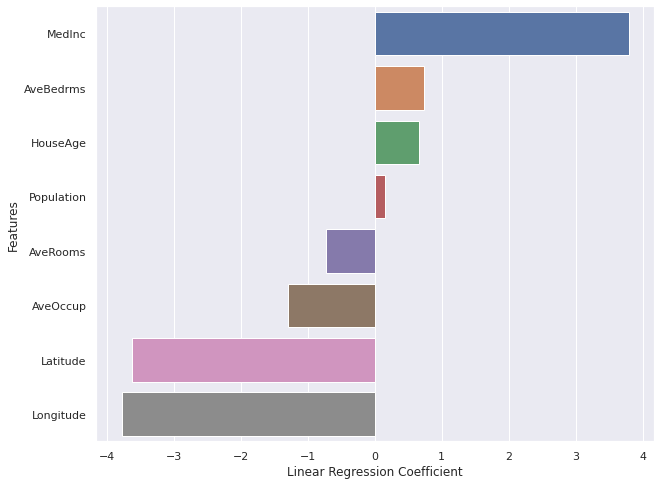

In [212]:
#plotting the coefficient values

#creating dataframe to store feature name and its coefficient
col_coef = pd.DataFrame({'Columns' : X_training.columns, 'Coefficient' : linreg.coef_})
col_coef_sorted = col_coef.sort_values('Coefficient', ascending = False)

#plot
plt.figure(figsize=(10,8))
sns.barplot(x = "Coefficient", y = "Columns", data = col_coef_sorted)
plt.xlabel('Linear Regression Coefficient')
plt.ylabel('Features')
plt.show()

# Using Statsmodel

statsmodel library is extremely useful statistical modeling. We will use OLS (Ordinary Least Square) API in statsmodel for our linear regression. It'll estimate the coefficients of X features, and not the value of intercept. In order to determine the intercept, we'll add one separate column with a constant term (we'll keep all value as 1 for that column).

# Validation of Model Assumptions

 **Assumption 1:
The Dependent variable and target variable must have a linear relationship.**

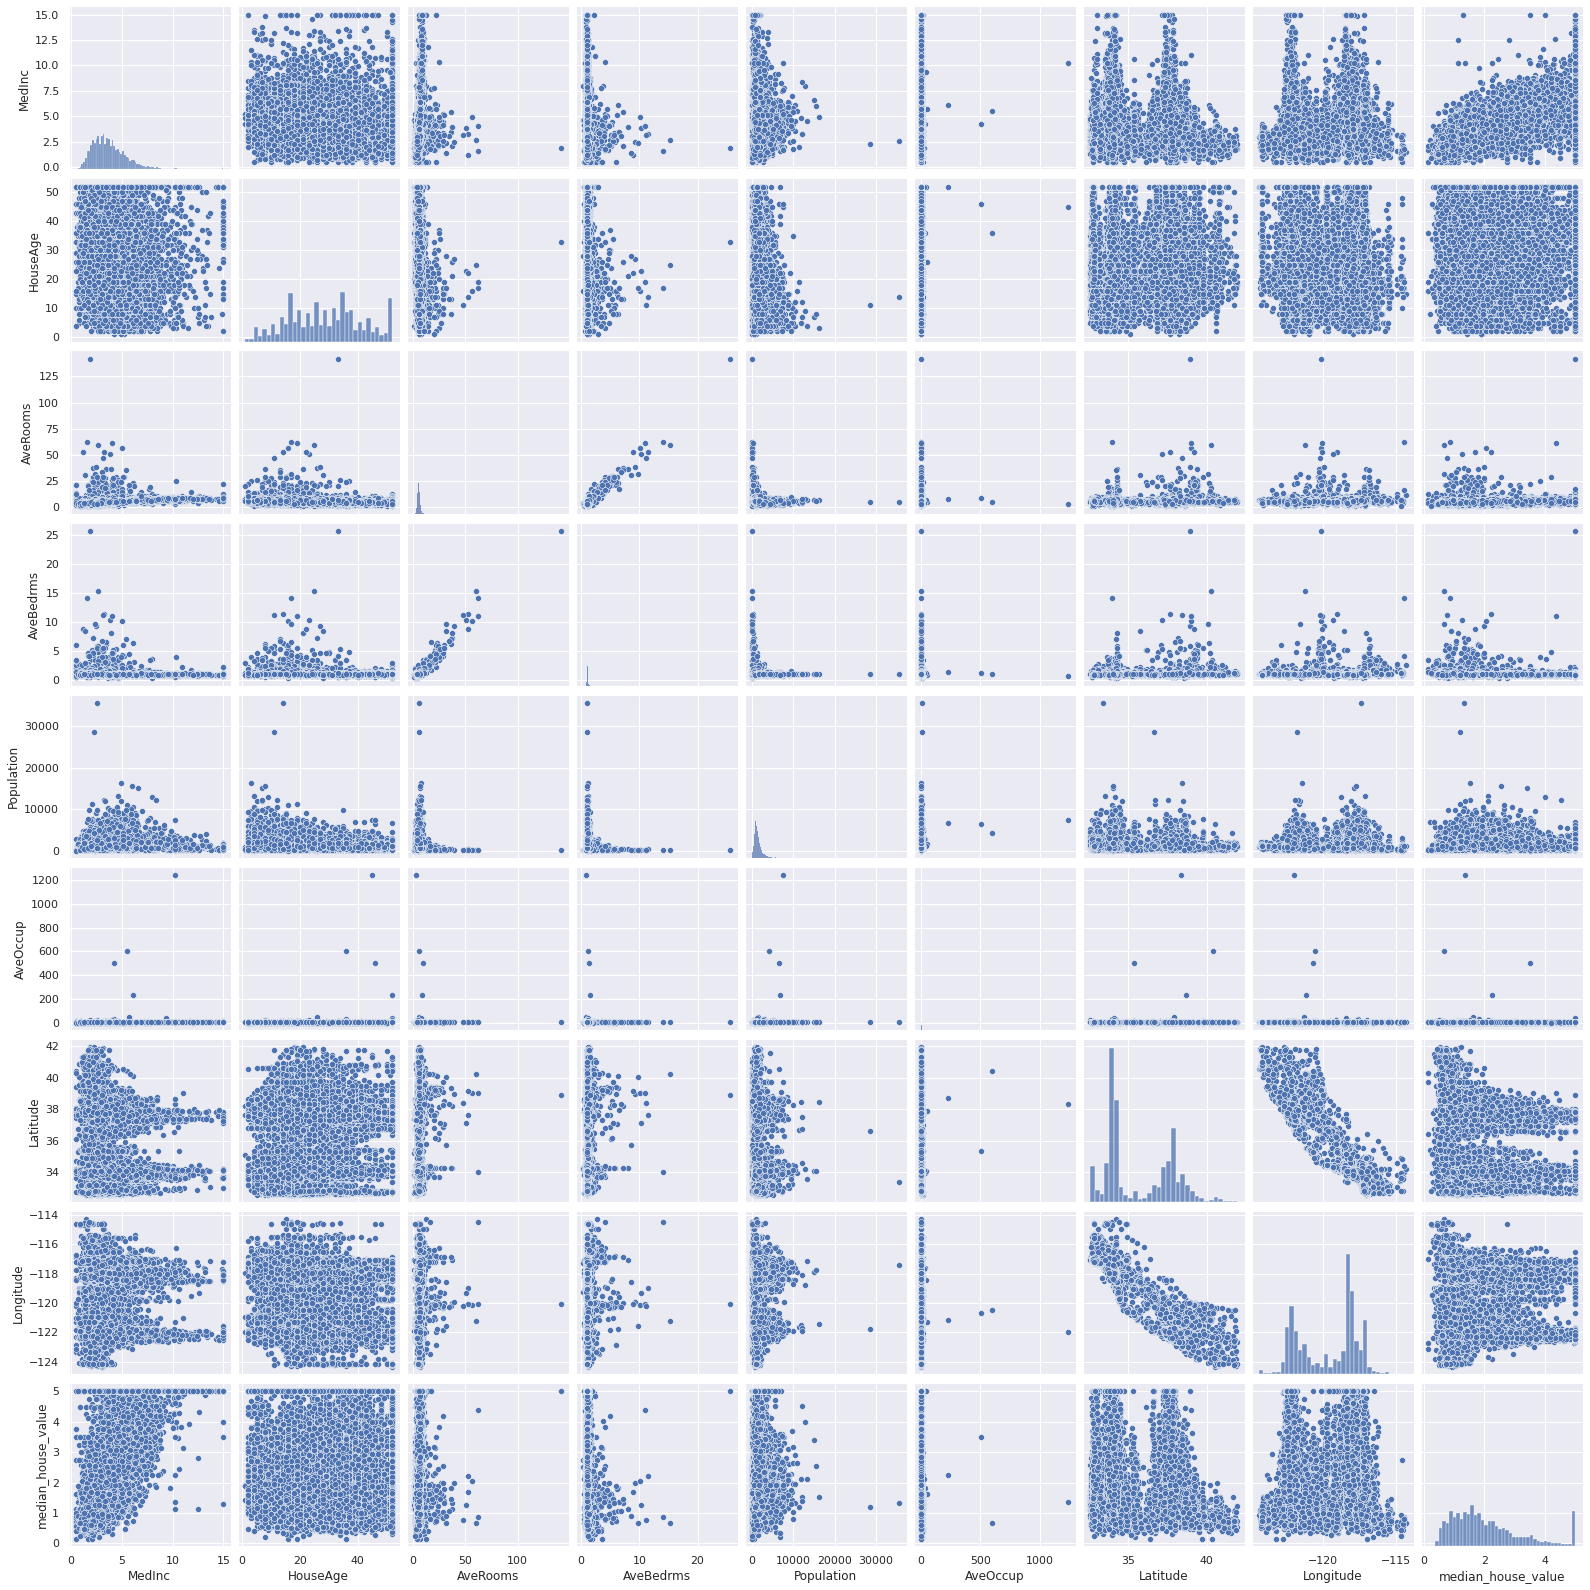

In [213]:
#importing library
import seaborn as sns
#setting theme
sns.set_theme(style="darkgrid")

#plotting pairplot
sns.pairplot(train_set)
plt.show()

*As we can see that the feature doesn't have a linear relation with the target, thus violating the assumption that dependent variable and independent variable must have a linear relationship.*

*In order to fix non-linearity, we need to perform some transformation of the nndependent variable( like log transformation  or other non-linear transformations.)*

# Multi-Collinearity

When the dataset has multiple independent vatiables, there is possibility of some of those features to be hghly correlated. The presence of high correlation between independent variable is known as multi-collinearity. Its presence can destabilize the model.

In order to identify the existence of multi-collinearity we we use the measurement known as Variance Inflation Factor (VIF). VIF is the ratio of variance in the model with multiple variables, divided by the variance of a model with one variable alone.

In [214]:
#importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#defining a function to return vif
def vif_val(X):
  X_matrix = X.values
  vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
  vif_value = pd.DataFrame()
  vif_value['Feature'] = X.columns
  vif_value['VIF'] = vif
  return vif_value

In [215]:
vif_values = vif_val(X_training)
vif_values.sort_values(by = 'VIF')

,Feature,VIF
4,Population,4.997547
1,HouseAge,7.570278
0,MedInc,16.802039
5,AveOccup,21.109772
2,AveRooms,50.850830
3,AveBedrms,242.265092
6,Latitude,650.040852
7,Longitude,1216.586770


# Testing normality of residuals

Now we'll valideate the assumption of normality of residuals for linear regression. It can be checked using the probability-probability plot (P-P Plot). It'llcompare the cumulative distribution function of two probability distribution against each other. For our context, we'll be seeing if residual distribution matches with normal distribution or not.

In [217]:
#finding residual
res = (y_test - y_pred_test)

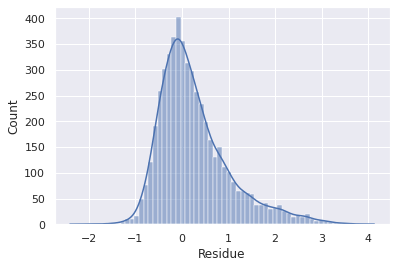

In [218]:
#plotting histogram for residual


#importing library
import seaborn as sns
#setting theme
sns.set_theme(style="darkgrid")
#plotting chart
sns.histplot(data=res, kde=True)
plt.xlabel('Residue')

plt.show()

In [219]:
def draw_pp_plot(res):
  import statsmodels.api as sm
  probplot = sm.ProbPlot(res)
  plt.figure(figsize = (10,8))
  probplot.ppplot(line = '45')
  plt.title('Normal P-P Plot of Regression Residuals')
  plt.show()

<Figure size 720x576 with 0 Axes>

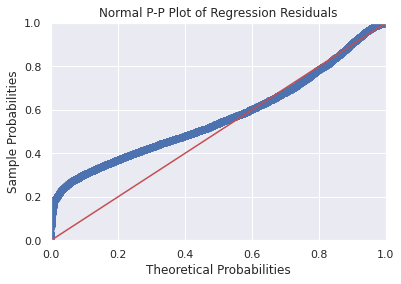

In [220]:
draw_pp_plot(res)

The diagonal line in above chart represents the cumulative distribution of normal distribution, whereas the other dotted curve represents the cumulative distribution of residuals.
 Since the dots are not close to the diagonal line we can infer that the residuals do not follow normal distribution.

 We need to perform transformation of dependent or independent variable.

# Testing Homoscedasticity

Homoscedasticity or constant variance of errors can be observed through a residual plot (plot between standardized residual value and standardized predicted value). 

In [221]:
#let us first define a custom function for standardization
def standardize_val(val):
  return (val-val.min())/(val.max() - val.min())

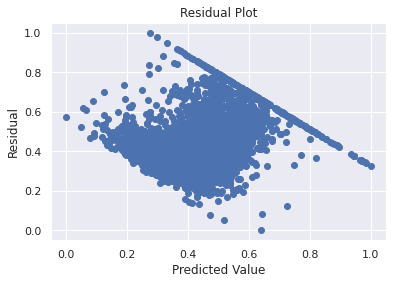

In [222]:
#we'll plot a scatter plot to see the variance
plt.scatter(standardize_val(y_pred_test), standardize_val(res))
plt.title('Residual Plot')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()

*As we can see a funnel shape in the residual vs fitted plot, representing heteroscedasticity, we need to perform non linear transformation of the dependent variable(log transformation or any other non-linear transformation.)*

Residuals versus predicting variables plot is used for checking independence assumption. If the residuals are distributed uniformly randomly around the zero x-axes and do not form any specific clusters, then the assumption holds true.

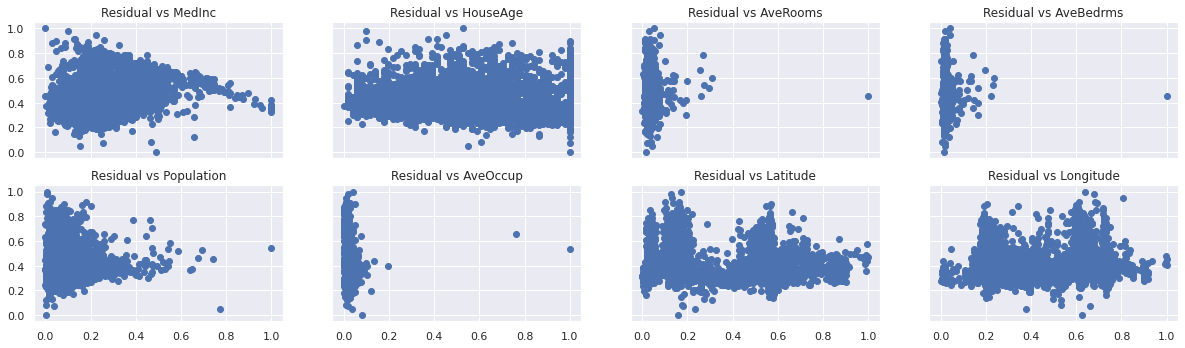

In [223]:
#plotting subplot
fig, ax = plt.subplots(ncols=4, nrows = 2, sharey=True, sharex=True)
MedInc = ax[0][0].scatter(standardize_val(X_testing['MedInc']), standardize_val(res))
ax[0][0].set_title('Residual vs MedInc')

HouseAge = ax[0][1].scatter(standardize_val(X_testing['HouseAge']), standardize_val(res))
ax[0][1].set_title('Residual vs HouseAge')

AveRooms = ax[0][2].scatter(standardize_val(X_testing['AveRooms']), standardize_val(res))
ax[0][2].set_title('Residual vs AveRooms')

AveBedrms = ax[0][3].scatter(standardize_val(X_testing['AveBedrms']), standardize_val(res))
ax[0][3].set_title('Residual vs AveBedrms')

Population = ax[1][0].scatter(standardize_val(X_testing['Population']), standardize_val(res))
ax[1][0].set_title('Residual vs Population')

AveOccup = ax[1][1].scatter(standardize_val(X_testing['AveOccup']), standardize_val(res))
ax[1][1].set_title('Residual vs AveOccup')

Latitude = ax[1][2].scatter(standardize_val(X_testing['Latitude']), standardize_val(res))
ax[1][2].set_title('Residual vs Latitude')

Longitude = ax[1][3].scatter(standardize_val(X_testing['Longitude']), standardize_val(res))
ax[1][3].set_title('Residual vs Longitude')

#setting figure size
fig.set_size_inches(20.5, 5.5, forward=True)
plt.show()